In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Add psuedocount

>! qiime composition add-pseudocount \
--i-table Data/tax-6-table.qza \
--o-composition-table Data/tax-6-psuedo-table.qza

# ANCOM
## IBS

>! qiime composition ancom \
--i-table Data/tax-6-psuedo-table.qza \
--m-metadata-file Data/IBS-metadata.txt \
--m-metadata-column IBS \
--o-visualization ANCOM-res/L6-IBS.qzv

#### Results:

- Identified one differentially abundant taxon: d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnospiraceae_ND3007_group W= 42

In [48]:
tax = Artifact.load("Data/tax-6-table.qza").view(pd.DataFrame)

#Convert to relative abundance
tax_mat = np.matrix(tax)
tax_mat /= np.sum(tax_mat, axis=1)

tax = pd.DataFrame(tax_mat,
                   index=tax.index,
                   columns=tax.columns)

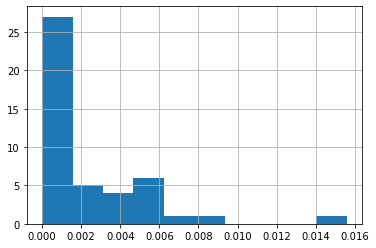

In [49]:
tax["d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnospiraceae_ND3007_group"].hist()

In [27]:
metadata = pd.read_csv("Data/IBS-metadata.txt", sep="\t", index_col="Sampleid")

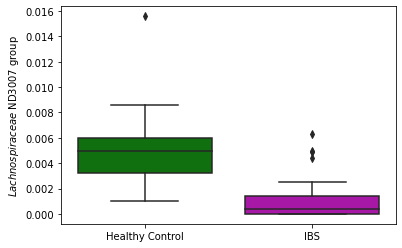

In [66]:
ax = sns.boxplot(x=metadata["IBS"].apply(lambda x: "IBS" if x=="Y" else "Healthy Control"),
                y=tax["d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnospiraceae_ND3007_group"],
                palette=["g","m"])

ax.set_ylabel(r"$Lachnospiraceae$ ND3007 group")
ax.set_xlabel("")

plt.savefig("Figures/ANCOM-Lachnospiraceae.pdf")
plt.show()

## IBS Type

In [18]:
! qiime composition ancom \
--i-table Data/tax-6-psuedo-table.qza \
--m-metadata-file Data/IBS-metadata-ancom.txt \
--m-metadata-column IBS-Type \
--o-visualization ANCOM-res/L6-IBStype.qzv

Saved Visualization to: ANCOM-res/L6-IBStype.qzv


#### Results:
- Identified one differentially abundant taxon: d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Eisenbergiella	W = 150

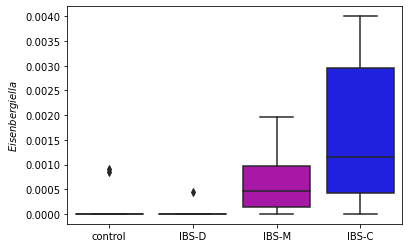

In [67]:
ax = sns.boxplot(x=metadata["IBS Type"],
                y=tax["d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Eisenbergiella"],
                order=["control","IBS-D","IBS-M","IBS-C"],
                palette=["g","r","m","b"])

ax.set_ylabel(r"$Eisenbergiella$")
ax.set_xlabel("")
plt.savefig("Figures/ANCOM-Eisenbergiella.pdf")
plt.show()

## High fructose corn syrup

In [20]:
from skbio.stats.composition import ancom
from qiime2 import Artifact

In [22]:
ptax = Artifact.load("Data/tax-6-psuedo-table.qza").view(pd.DataFrame)

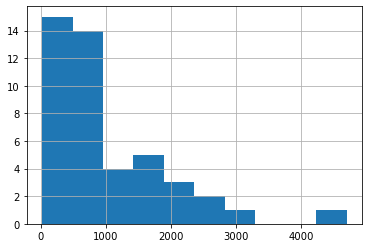

In [32]:
metadata["TOTAL EST HFCS (per month in grams)"].hist()

**It looks like there's a group that has < 1000, and then another group > 1000**

In [33]:
metadata["HFCS/month > 1000"] = metadata["TOTAL EST HFCS (per month in grams)"].apply(lambda x: "High" if x>1000 else "Low")

In [43]:
HFCS_ancom = ancom(ptax,
                  grouping=metadata["HFCS/month > 1000"])[0]

#### Results

In [44]:
HFCS_ancom[HFCS_ancom["Reject null hypothesis"]==True]

,W,Reject null hypothesis


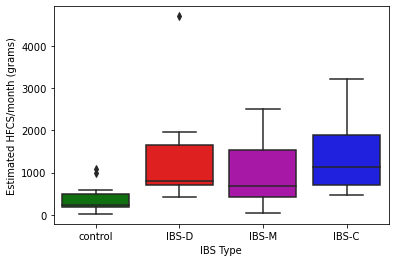

In [65]:
ax = sns.boxplot(x=metadata["IBS Type"],
                y=metadata["TOTAL EST HFCS (per month in grams)"],
                order=["control","IBS-D","IBS-M","IBS-C"],
                palette=["g","r","m","b"])

ax.set_ylabel("Estimated HFCS/month (grams)")
plt.savefig("Figures/HFCS-IBStype.pdf")
plt.show()